In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
files = os.listdir("../data/first_measurements_pilot")
files = [x for x in files if 'csv' in x]
files

['1cae8d05-62aa-4c41-a9d3-79e6984f6629.csv',
 '1dc118d6-8af6-41df-aa98-615e9dca8e0c.csv',
 '2244d39f-1180-47c9-b117-14a3a7daed27.csv',
 '425aa44b-e616-4341-931d-a9dfc4c477a3.csv',
 '52c92a54-7060-487d-bc42-a03d126ee797.csv',
 '5f23bb61-557f-4219-86ea-8a7a817ad4dc.csv',
 '66eb34f0-68d6-456d-ad51-2cf68e01f2ba.csv',
 '686689f4-3823-4957-aa69-b02aeff0a1f4.csv',
 '71890471-f7a7-435d-94df-95293f9da3dc.csv',
 '78f957c2-3eaf-489c-85f1-4ec3ae739244.csv',
 '7dfef894-4e9b-4f25-8392-a051d67f3b31.csv',
 '9490675d-ed75-48cd-b01f-a2acc122f8a3.csv',
 '99a7a52b-210f-46ab-b8b6-c1591930ec1c.csv',
 'af8dfc33-b5fa-4fcd-8bb5-ddd65e161a2b.csv',
 'c20d51eb-6b93-48ec-867c-152af216f7f5.csv',
 'c2349f16-574e-4fa5-a46c-a9531bab45b7.csv',
 'c6e38c63-256f-4605-aa63-58811e8b7f55.csv',
 'c761f771-37d3-4169-b7e8-0b25aa80bf96.csv',
 'cd1aa13f-12a6-4c3b-a9fa-d5b1c456e407.csv',
 'fbf6a279-189d-4e81-9bb5-938c269197c7.csv',
 'fc4f3867-3302-4ee9-b0f9-0e6b2463d96b.csv']

In [4]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"../data/first_measurements_pilot/{file}"))
data = pd.concat(dataframes)
data

,Unnamed: 0,id,framework,complexity,program,ete,fw,diff,fw_running
0,0,0,javaswing,default,bitblt_fw_False,52532,0,52532,0.0
1,1,1,javaswing,default,bitblt_fw_False,53800,0,53800,0.0
2,2,2,javaswing,default,bitblt_fw_False,61160,0,61160,0.0
3,3,3,javaswing,default,bitblt_fw_False,63996,0,63996,0.0
4,4,4,javaswing,default,bitblt_fw_False,50176,0,50176,0.0
...,...,...,...,...,...,...,...,...,...
95,95,95,pyglet,rects,getdbits_fw_True,39872,23901,15971,NaN
96,96,96,pyglet,rects,getdbits_fw_True,30372,22902,7470,NaN
97,97,97,pyglet,rects,getdbits_fw_True,40572,22902,17670,NaN
98,98,98,pyglet,rects,getdbits_fw_True,55440,46340,9100,NaN


In [5]:
import numpy as np
data['fw_running'] = np.where((data['program'].str.contains('False')), '0', '1')
data['program'] = data['program'].apply(lambda x: x.split('_')[0])
data

,Unnamed: 0,id,framework,complexity,program,ete,fw,diff,fw_running
0,0,0,javaswing,default,bitblt,52532,0,52532,0
1,1,1,javaswing,default,bitblt,53800,0,53800,0
2,2,2,javaswing,default,bitblt,61160,0,61160,0
3,3,3,javaswing,default,bitblt,63996,0,63996,0
4,4,4,javaswing,default,bitblt,50176,0,50176,0
...,...,...,...,...,...,...,...,...,...
95,95,95,pyglet,rects,getdbits,39872,23901,15971,1
96,96,96,pyglet,rects,getdbits,30372,22902,7470,1
97,97,97,pyglet,rects,getdbits,40572,22902,17670,1
98,98,98,pyglet,rects,getdbits,55440,46340,9100,1


<Axes: title={'center': 'end-to-end latencies with/without running fw-tester per pixel reader'}, xlabel='program', ylabel='ete'>

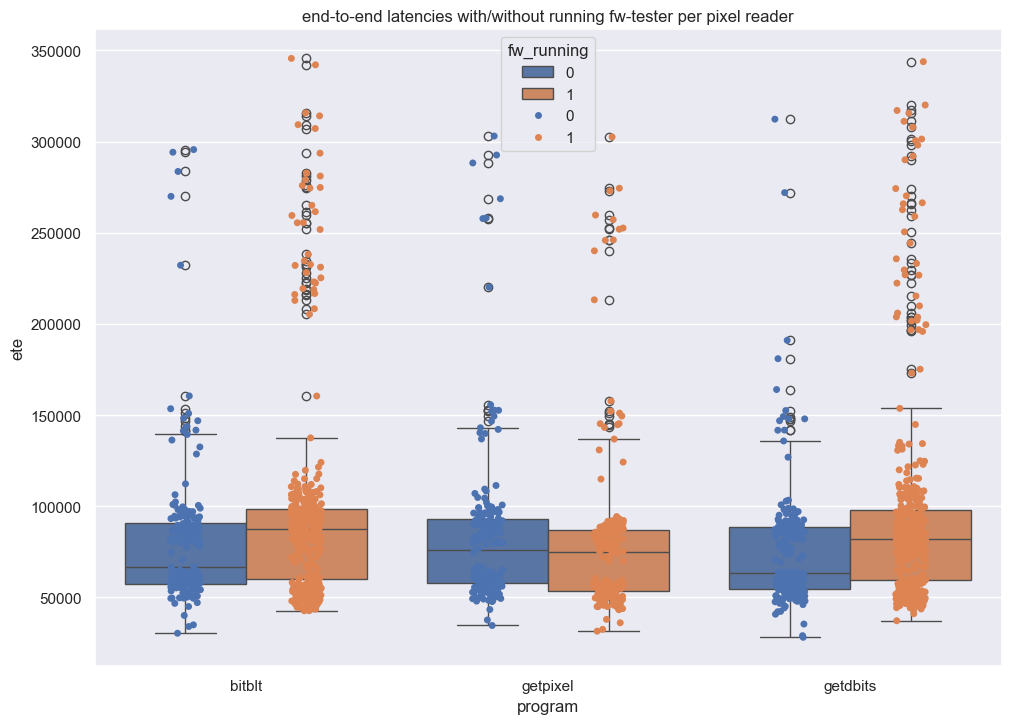

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data[(data['framework'] == 'javaswing')], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester per pixel reader')
sns.stripplot(data=data[(data['framework'] == 'javaswing')], x='program', y='ete', hue='fw_running', dodge=True)

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_7572\1518877406.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[(data['complexity'] == 'default')], x='program', y='ete', hue='fw_running', dodge=True, color='black')


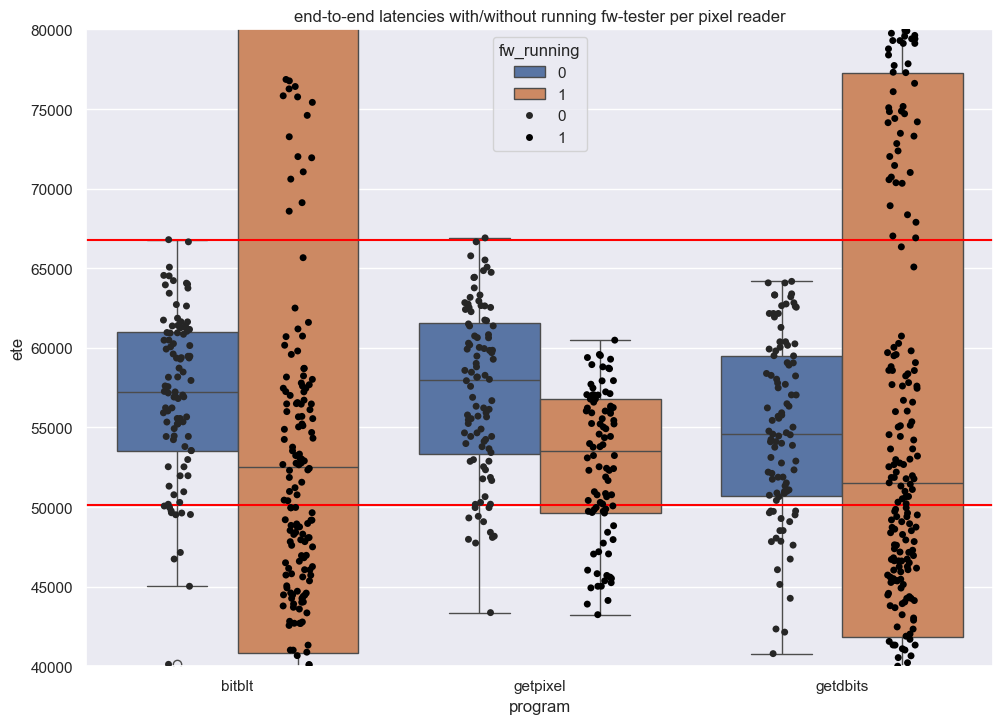

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data[(data['complexity'] == 'default')], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester per pixel reader')
sns.stripplot(data=data[(data['complexity'] == 'default')], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(40000, 80000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

<Axes: title={'center': 'framework latencies with/without running fw-tester per pixel reader'}, xlabel='program', ylabel='ete'>

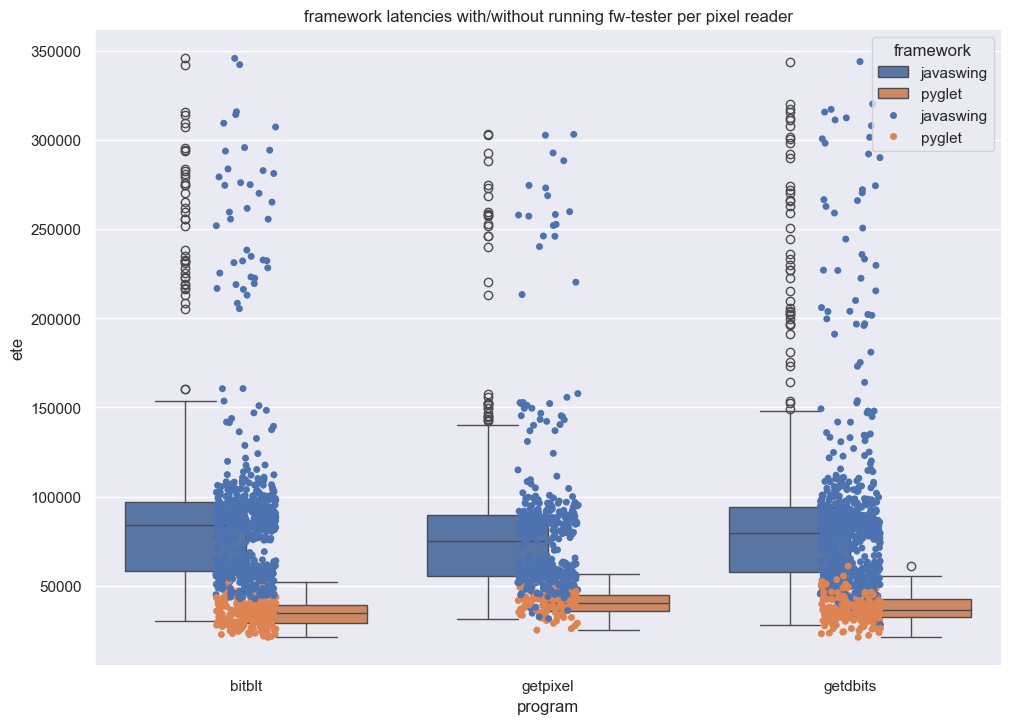

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data, x='program', y='ete', hue='framework').set_title('framework latencies with/without running fw-tester per pixel reader')
sns.stripplot(data=data, x='program', y='ete', hue='framework')

In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.boxplot(data=data, x='framework', y='fw')
# sns.stripplot(data=data, x='framework', y='fw')

In [ ]:
# plot framework latencies for default
# sns.boxplot(data=data[('False' not in data['program']) & (data['complexity'] != 'rects')], x='framework', y='fw')
# sns.stripplot(data=data[('False' not in data['program']) & (data['complexity'] != 'rects')], x='framework', y='fw')

In [ ]:
# plot framework latencies for rects
# sns.boxplot(data=data[('False' not in data['program']) & (data['complexity'] != 'default')], x='framework', y='fw')
# sns.stripplot(data=data[('False' not in data['program']) & (data['complexity'] != 'default')], x='framework', y='fw')

<Axes: title={'center': 'framework latency PYGLET'}, xlabel='complexity', ylabel='fw'>

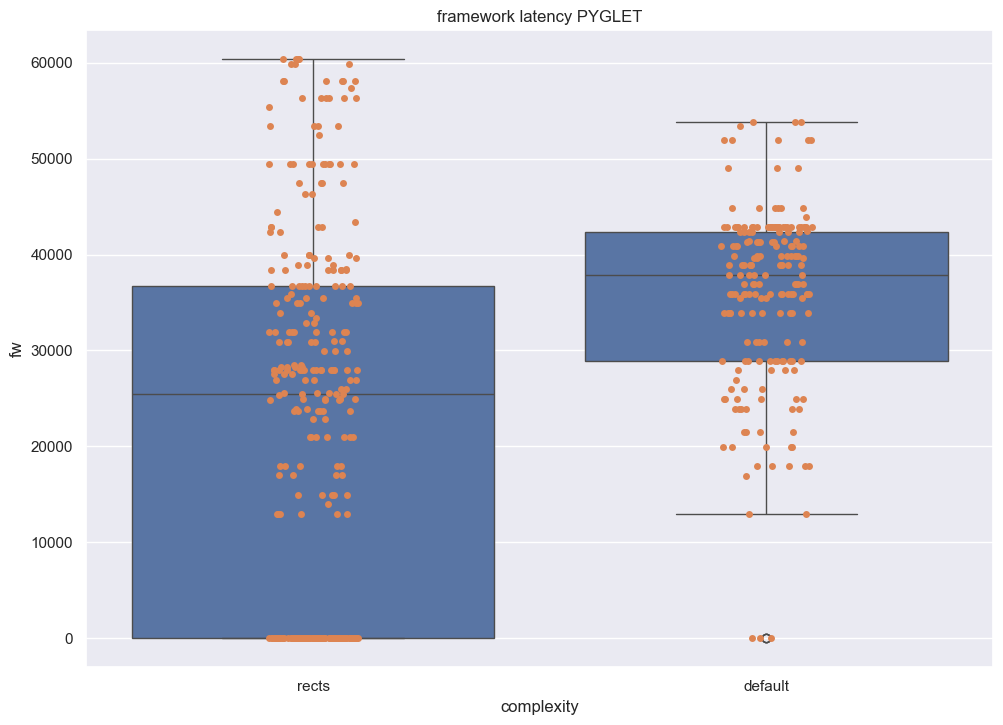

In [9]:
# plot framework latencies for pyglet
sns.boxplot(data=data[('False' not in data['program']) & (data['framework'] == 'pyglet')], x='complexity', y='fw').set_title('framework latency PYGLET')
sns.stripplot(data=data[('False' not in data['program']) & (data['framework'] == 'pyglet')], x='complexity', y='fw')

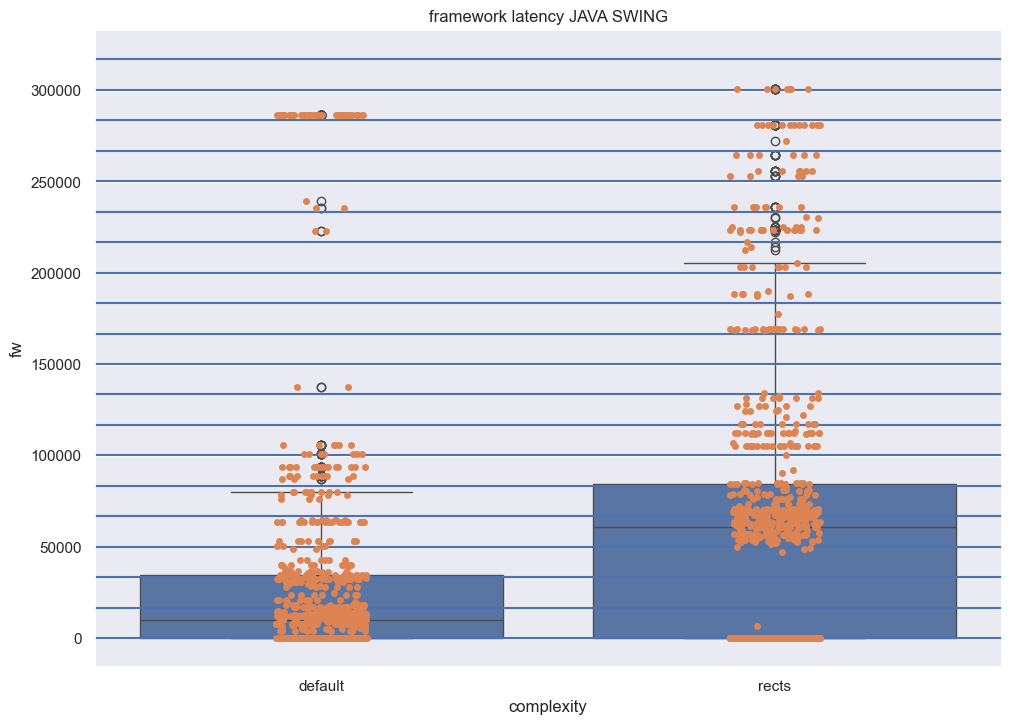

In [10]:
# plot framework latencies for java swing
sns.boxplot(data=data[('False' not in data['program']) & (data['framework'] == 'javaswing')], x='complexity', y='fw').set_title('framework latency JAVA SWING')
sns.stripplot(data=data[('False' not in data['program']) & (data['framework'] == 'javaswing')], x='complexity', y='fw')
ax = plt.gca()
for i in range(0, 20):
    plt.axhline(i*16.7*1000)

<Axes: title={'center': 'framework latency'}, xlabel='framework', ylabel='fw'>

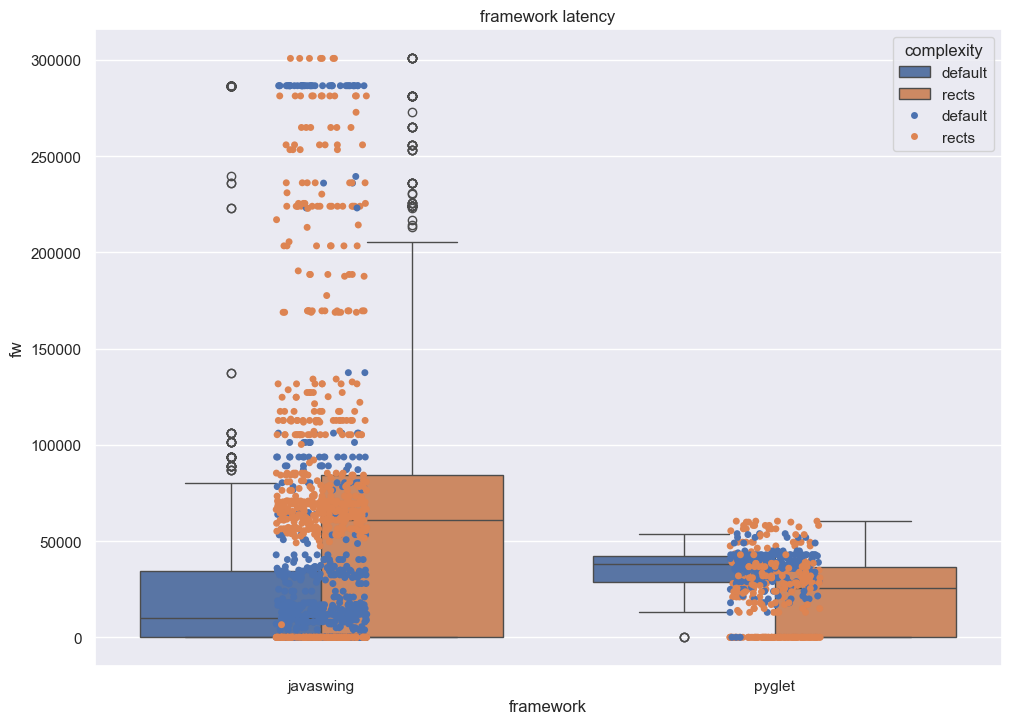

In [ ]:
# plot framework latencies (default and rects)
sns.boxplot(data=data, x='framework', y='fw', hue='complexity').set_title('framework latency')
sns.stripplot(data=data, x='framework', y='fw', hue='complexity')

<Axes: title={'center': 'latency differences'}, xlabel='framework', ylabel='diff'>

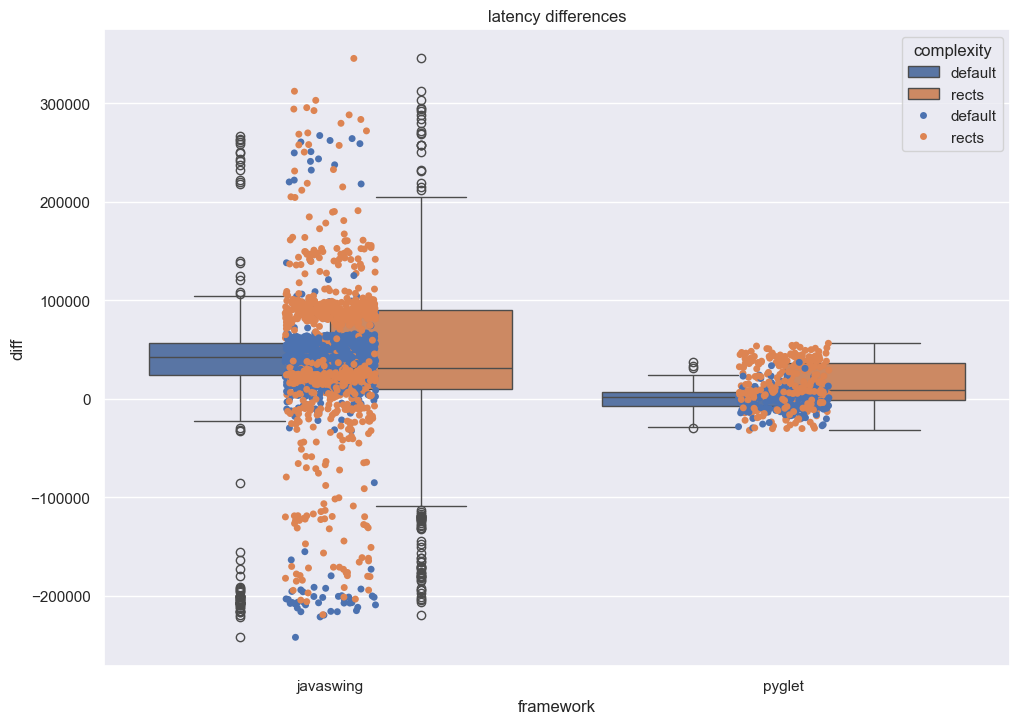

In [ ]:
# plot diffs (default and rects)
sns.boxplot(data=data, x='framework', y='diff', hue='complexity').set_title('latency differences')
sns.stripplot(data=data, x='framework', y='diff', hue='complexity')
# sns.boxplot(data=data[('False' not in data['program']) & (data['complexity'] != 'rects')], x='framework', y='diff')

<Axes: title={'center': 'end-to-end latency'}, xlabel='framework', ylabel='ete'>

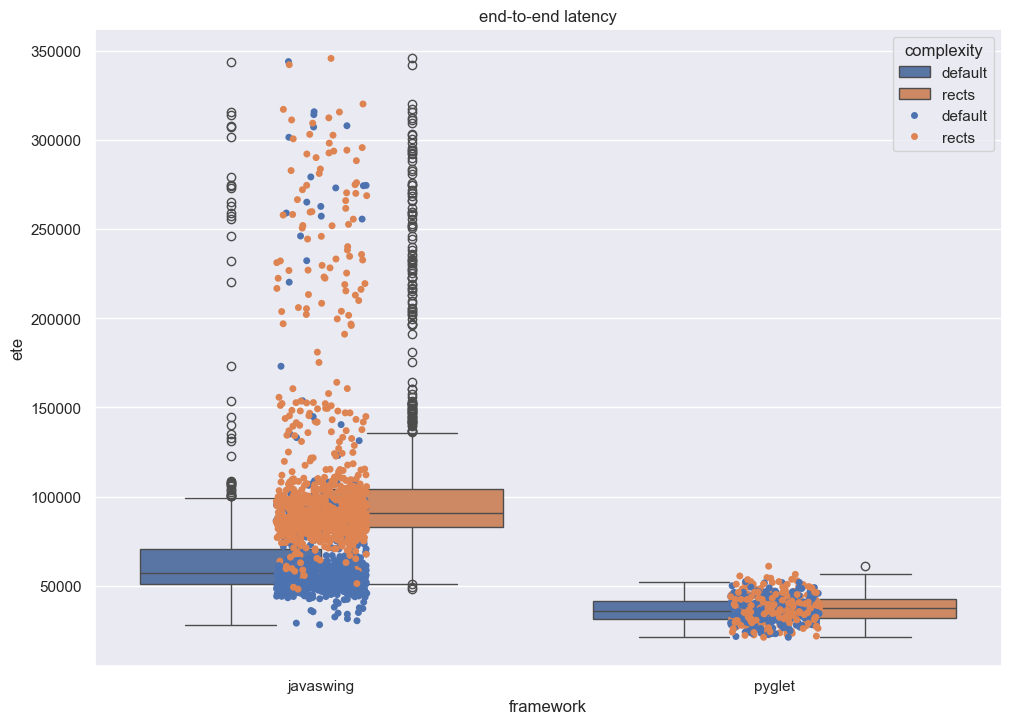

In [ ]:
# plot etes (default and rects)
sns.boxplot(data=data, x='framework', y='ete', hue='complexity').set_title('end-to-end latency')
sns.stripplot(data=data, x='framework', y='ete', hue='complexity')
# sns.boxplot(data=data[('False' not in data['program']) & (data['complexity'] != 'rects')], x='framework', y='ete')